In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

import theano
theano.config.optimizer = 'fast_run'

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
import matplotlib.pyplot as plt


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


no gdal


In [2]:
geo_model = gp.create_model('Greenstone')

In [4]:
# Importing the data from csv files and settign extent and resolution
geo_model = gp.init_data(geo_model, [696000,747000,6863000,6930000,-20000, 200],[50, 50, 50],
                         path_o = os.pardir+"/data/input_data/tut_SandStone/SandStone_Foliations.csv",
                         path_i = os.pardir+"/data/input_data/tut_SandStone/SandStone_Points.csv")

In [5]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,SimpleMafic2,Default series,1,False,#015482,1
1,SimpleBIF,Default series,2,False,#9f0052,2
2,SimpleMafic1,Default series,3,False,#ffbe00,3
3,EarlyGranite,Default series,4,False,#728f02,4
4,basement,Basement,1,True,#443988,5


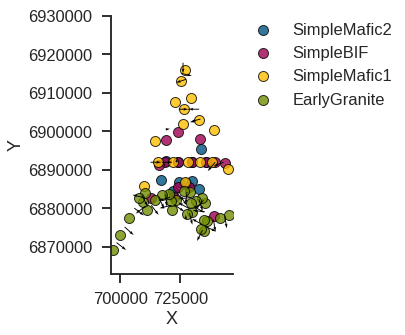

In [6]:
gp.plot.plot_data(geo_model, direction='z')

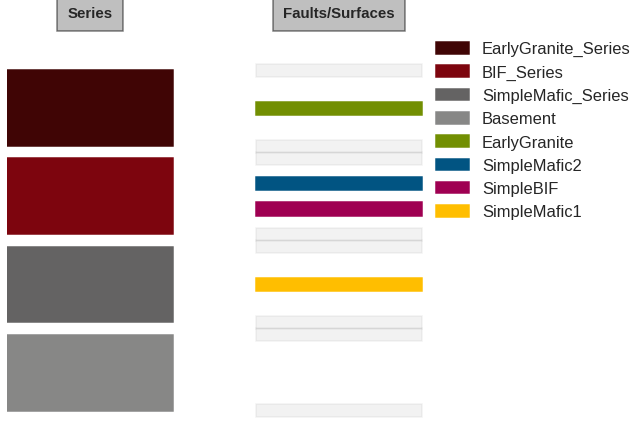

In [7]:
gp.map_series_to_surfaces(geo_model, {"EarlyGranite_Series": 'EarlyGranite', 
                         "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                          "SimpleMafic_Series":'SimpleMafic1', 'Basement':'basement'})

In [8]:
geo_model.add_surface_values([2.61,2.92,3.1,2.92,2.61])

,surface,series,order_surfaces,isBasement,color,id,value_0
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,1,2.61
0,SimpleMafic2,BIF_Series,1,False,#015482,2,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,3,3.1
2,SimpleMafic1,SimpleMafic_Series,1,False,#ffbe00,4,2.92
4,basement,Basement,1,True,#443988,5,2.61


In [9]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [10]:
gp.compute_model(geo_model, set_solutions=True)


Lithology ids 
  [5. 5. 5. ... 5. 5. 5.] 

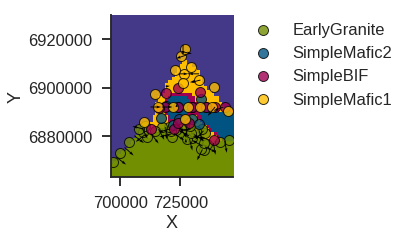

In [11]:
gp.plot.plot_section(geo_model, 45, direction='z', plot_data=True)

In [12]:
geo_model.solutions.values_matrix

array([[2.61, 2.61, 2.61, ..., 2.61, 2.61, 2.61]])

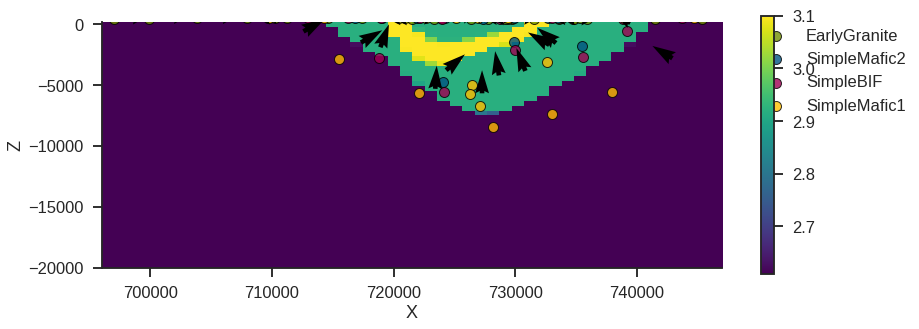

In [13]:
gp.plot.plot_section(geo_model, 25, block = geo_model.solutions.values_matrix,  direction='y', plot_data=True,
                    cmap='viridis', norm=None)

plt.colorbar()

### Saving the model

In [14]:
gp.save_model(geo_model, path=os.pardir+'/data/gempy_models')

True

In [ ]:
geo_model.meta.project_name

In [ ]:
break

In [ ]:
from gempy.assets.geophysics import GravityGrid

In [ ]:
g = GravityGrid()

In [ ]:
a,b,c = g.create_irregular_grid_kernel(resolution=[10,10,20], radio=5000)

In [ ]:
g.set_irregular_grid(np.array([[720000, 6890000,50]]), a)

In [ ]:
#g.values = np.empty((0,3))

In [ ]:
gp.compute_model_at(g, geo_model)

In [ ]:
geo_model.solutions.values_matrix.shape

In [ ]:
g.values[:, 0::2]

In [ ]:
%matplotlib qt5
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(g.values[:, 0], g.values[:,1], g.values[:,2],
           c = geo_model.solutions.values_matrix[0], cmap='viridis')
# ax.scatter(a[:, 0] - b[:, 0],a[:, 1], a[:, 2], s=5)
# ax.scatter(a[:, 0], a[:, 1] - b[:, 1], a[:, 2], s=5)
# ax.scatter(a[:, 0] ,a[:, 1], a[:, 2] - b[:, 2], s=5)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
geo_model.solutions.values_matrix[0].shape[0]/2

In [ ]:
tz = g.set_tz_kernel(resolution=[10,10,20], radio=100)

In [ ]:
tz * geo_model.solutions.values_matrix[0, :5082]

In [ ]:
%matplotlib qt5
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(g.values[:, 0], g.values[:,1], g.values[:,2],
           c = tz * geo_model.solutions.values_matrix[0, :5082], cmap='viridis')
# ax.scatter(a[:, 0] - b[:, 0],a[:, 1], a[:, 2], s=5)
# ax.scatter(a[:, 0], a[:, 1] - b[:, 1], a[:, 2], s=5)
# ax.scatter(a[:, 0] ,a[:, 1], a[:, 2] - b[:, 2], s=5)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
import gempy.core.interpolator_pro as ip
from importlib import reload
reload(ip)

In [ ]:
interp_g = ip.InterpolatorGravity(geo_model.surface_points, geo_model.orientations, geo_model.grid,
                                  geo_model.surfaces,
                                  geo_model.series, geo_model.faults,
                                  geo_model.additional_data)
                          

In [ ]:
interp_g.theano_graph.tz.set_value(tz.astype('float32'))

In [ ]:
import theano.tensor as T
import theano
T.repeat(interp_g.theano_graph.tz, 5)

In [ ]:
th_f2 = interp_g.compile_th_fn(pos_density=1)

In [ ]:
th_f = interp_g.compile_th_fn(density= geo_model.solutions.values_matrix[0, :5082])

In [ ]:
th_f2(*interp_g.get_python_input_block())

In [ ]:
th_f(*interp_g.get_python_input_block())

In [ ]:
 geo_model.solutions.values_matrix[0, :5082]

In [ ]:
import gempy.core.interpolator_pro as ip
from importlib import reload
from gempy.assets.geophysics import GravityGrid
reload(ip)

In [ ]:
X = np.linspace(7.050000e+05,747000, 20)
Y = np.linspace(6863000,6925000, 20)
z = 300
xyz= np.meshgrid(X, Y,z)
xy_ravel = np.vstack(map(np.ravel, xyz)).T

In [ ]:
xy_ravel.shape

In [ ]:
g2 = GravityGrid()

In [ ]:
g2.set_irregular_grid(xy_ravel, resolution = [5,5, 15], radio=5000)

In [ ]:
g2.set_tz_kernel( resolution = [5,5, 15], radio=5000)

In [ ]:
geo_model.set_grid_object(g2)

In [ ]:
interp_g2 = ip.InterpolatorGravity(geo_model.surface_points, geo_model.orientations, geo_model.grid,
                                  geo_model.surfaces,
                                  geo_model.series, geo_model.faults,
                                  geo_model.additional_data)

In [ ]:
interp_g2.theano_graph.tz.set_value(g2.tz.astype('float32'))

In [ ]:
theano.config.optimizer = 'fast_run'

In [ ]:
th_f2 = interp_g2.compile_th_fn(pos_density=1)

In [ ]:
a = th_f2(*interp_g2.get_python_input_block())

In [ ]:
a.reshape(400, -1).sum(axis=1).reshape(20,20)

In [ ]:
plt.imshow(a.reshape(400, -1).sum(axis=1).reshape(20,20), cmap='viridis_r', origin='bottom')

In [ ]:
g2.length

In [ ]:
plt.imshow(a.reshape(400, -1).sum(axis=1).reshape(20,20), cmap='viridis_r', origin='bottom')

In [ ]:
 interp_g2.theano_graph.compute_series()[0][1, :- 2 * interp_g2.theano_graph.len_points]

In [ ]:
geo_model.rescaling.df

In [ ]:
geo_model.rescaling.rescale_grid(interp_g2.grid.values)

In [ ]:
interp_g2.grid.values

In [ ]:
th3 = theano.function(interp_g2.theano_graph.input_parameters_loop,
                       interp_g2.theano_graph.compute_series()[0],
             #   interp_g2.theano_graph.compute_forward_gravity( interp_g2.theano_graph.compute_series()[0][1, :- 2 * interp_g2.theano_graph.len_points]),
                     on_unused_input = 'ignore')

In [ ]:
interp_g2.get_python_input_block()

In [ ]:
th3(*interp_g2.get_python_input_block())

In [ ]:
interp_g2.theano_graph.tz.get_value()

In [ ]:
a = th_f2(*interp_g2.get_python_input_block())

In [ ]:
a = th_f2(*interp_g2.get_python_input_block())
plt.imshow(a.reshape(20,20), cmap='viridis')

In [ ]:
a = Out[54]

In [ ]:
a.shape